# Web Structure Mining


### la documentation officielle de Networkx:  https://networkx.org/documentation/stable/index.html

In [16]:
%matplotlib inline

import networkx as nx
from networkx.algorithms import community as nxcommunity
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### commencer par le chargement du graphe

In [17]:
pathData = "lesmis.gml"

### ensuite, naviguer sur la documentation de networkx et trouver comment charger un réseau dans le format GML

Vous pouvez avoir une idée sur ce format en ouvrant le fichier dans un editeur. à noter que le graphe n'est pas dirigé 

In [18]:
g = nx.read_gml(pathData)
type(g)

networkx.classes.graph.Graph

## La détection de communauté 
Dans cette section, nous nous concentrerons sur l'algorithme de détection de communauté. Pour cela, consultez la documentation du package networkx et appliquez les algorithmes de détection de communauté suivants:

1. La méthode de bipartition de Kernighan–Lin 
2. La méthode de Percolation (K-clique) vue dans le cours 
3. La méthode Fluid communities 
4. La méthode Girvan-Newman vue dans le cours 
 
Lorsque le nombre de communautés à détecter doit être spécifié en tant que paramètre, vous utiliserez la métrique de couverture (coverage metric) pour sélectionner le nombre approprié (compris entre 2 et 5).

Enfin, pour chaque algorithme de communauté, vous ajouterez un attribut à chaque nœud du graphe. La valeur de l'attribut sera l'identifiant de la communauté à laquelle appartient le nœud (allant de 0 à nbCommunity -1).

In [19]:
community = {}

def dictite_to_dict(d):
    s = []
    for part in d:
        a = set()
        for i in part:
            a.add(i)
        s.append(a)
    return s

#### 1.La méthode de bipartition de Kernighan–Lin

In [20]:
community['bipartition'] = dictite_to_dict(nxcommunity.kernighan_lin.kernighan_lin_bisection(g))

#### 2. La méthode de Percolation (K-clique)

In [21]:
community['percolation'] = dictite_to_dict(nxcommunity.k_clique_communities(g, 3))

#### 3. La méthode Fluid communities

In [22]:
res = {}
partitions = {}
for i in range(2, 6):
    part = list(nxcommunity.asyn_fluidc(g, i))
    res[i] = nxcommunity.quality.coverage(g, dictite_to_dict(part))
    partitions[i] = part
    
community['fluid'] = dictite_to_dict(partitions[max(res, key=res.get)])

#### 4. La méthode Girvan-Newman

In [23]:
res = {}
grivan = list(nxcommunity.girvan_newman(g))
for i in range(0, 5):
    res[i] = nxcommunity.quality.coverage(g, dictite_to_dict(grivan[i]))

community['girvan'] = dictite_to_dict(grivan[max(res, key=res.get)])

In [24]:
for k, v in community.items():
    for c_num in range(len(v)):
        for n in v[c_num]:
            g.nodes[n][k] = c_num

## la visualisation des communautés 
Nous allons maintenant visualiser le résultat de l'algorithme de détection de communication. Pour cela, nous commençons par filtrer certains nœuds de la visualisation. En particulier, nous aimerions filtrer les nœuds qui n'appartiennent à aucune communauté selon la méthode de percolation. Pour ce faire, vous devez créer une liste contenant le libellé des nœuds appartenant à une communauté selon la méthode de percolation. Vous pouvez utiliser le dictionnaire suivant pour définir les options de visualisation.

```json
options = {
    'node_color' : colorNode, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 10000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 15,
    "nodelist" : nodes, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8   
}

plt.figure(figsize=(18,18))
nx.draw(g,**options)```

{'Myriel': 2, 'MlleBaptistine': 2, 'MmeMagloire': 2, 'Valjean': 2, 'Marguerite': 0, 'Tholomyes': 3, 'Listolier': 3, 'Fameuil': 3, 'Blacheville': 3, 'Favourite': 3, 'Dahlia': 3, 'Zephine': 3, 'Fantine': 3, 'MmeThenardier': 0, 'Thenardier': 0, 'Cosette': 0, 'Javert': 0, 'Fauchelevent': 0, 'Bamatabois': 0, 'Perpetue': 0, 'Simplice': 0, 'Woman1': 0, 'Judge': 0, 'Champmathieu': 0, 'Brevet': 0, 'Chenildieu': 0, 'Cochepaille': 0, 'Pontmercy': 0, 'Eponine': 0, 'Anzelma': 0, 'Woman2': 0, 'MotherInnocent': 0, 'Gavroche': 1, 'Gillenormand': 0, 'MlleGillenormand': 0, 'LtGillenormand': 0, 'Marius': 0, 'BaronessT': 0, 'Mabeuf': 0, 'Enjolras': 0, 'Combeferre': 0, 'Prouvaire': 0, 'Feuilly': 0, 'Courfeyrac': 0, 'Bahorel': 0, 'Bossuet': 0, 'Joly': 0, 'Grantaire': 0, 'Gueulemer': 0, 'Babet': 0, 'Claquesous': 0, 'Montparnasse': 0, 'Toussaint': 0, 'Child1': 1, 'Child2': 1, 'Brujon': 0, 'MmeHucheloup': 0}
[2.0, 2.0, 2.0, 2.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

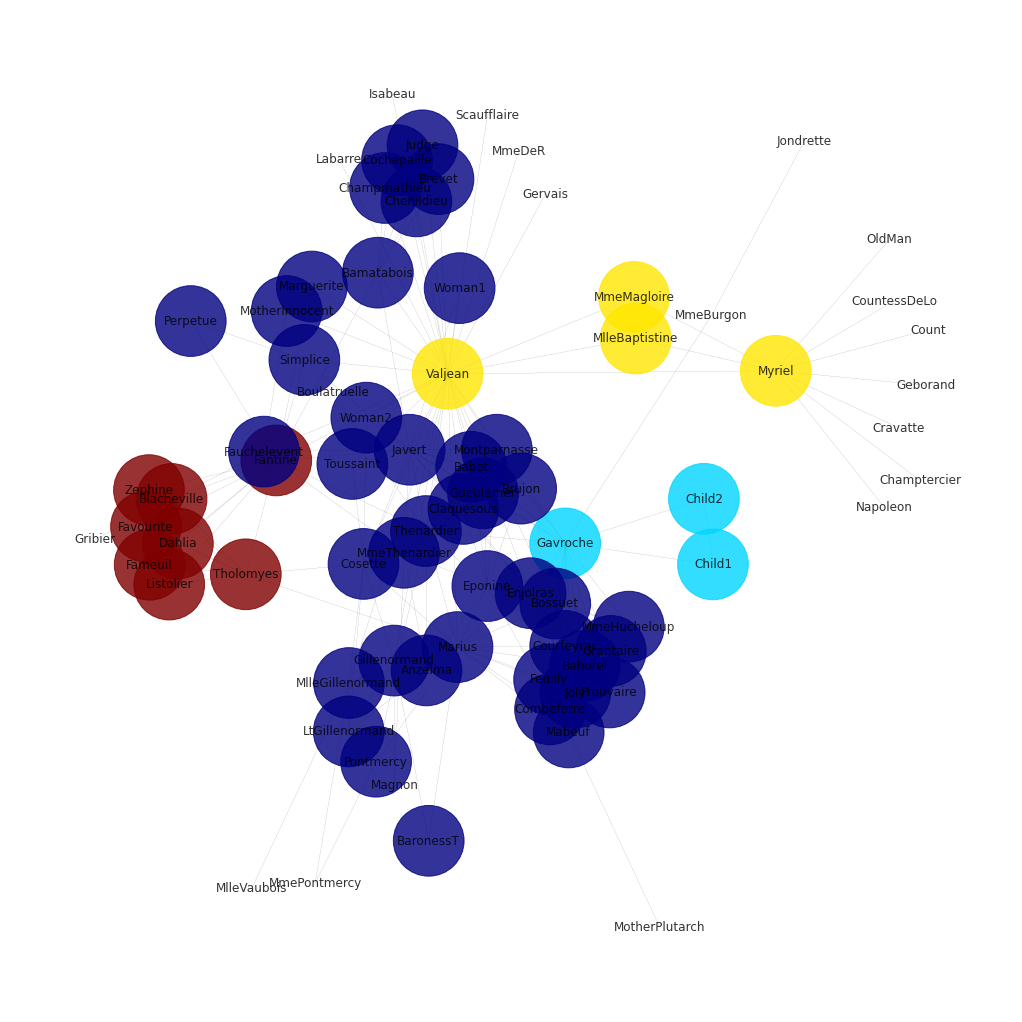

In [25]:
#supprimez les noeuds sans k_clique

node_list = []
node_color = []

percoAttr = nx.get_node_attributes(g, 'percolation')
percoAttrList = list(percoAttr)
print(percoAttr)

for node in percoAttrList:
    if (percoAttr[node] >= 0):
        node_color.append(float(percoAttr[node]))
        node_list.append(node)

print(node_color)
options = {
    'node_color' : node_color, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 5000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 12,
    "nodelist" : node_list, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8
}

plt.figure(figsize=(14,14))
nx.draw(g,**options)

# TAF

1. Visualisez les communautés produites en utilisant la méthode de Girvan-Newman

{'Myriel': 0, 'Napoleon': 0, 'MlleBaptistine': 0, 'MmeMagloire': 0, 'CountessDeLo': 0, 'Geborand': 0, 'Champtercier': 0, 'Cravatte': 0, 'Count': 0, 'OldMan': 0, 'Labarre': 1, 'Valjean': 1, 'Marguerite': 1, 'MmeDeR': 1, 'Isabeau': 1, 'Gervais': 1, 'Tholomyes': 1, 'Listolier': 1, 'Fameuil': 1, 'Blacheville': 1, 'Favourite': 1, 'Dahlia': 1, 'Zephine': 1, 'Fantine': 1, 'MmeThenardier': 1, 'Thenardier': 1, 'Cosette': 1, 'Javert': 1, 'Fauchelevent': 1, 'Bamatabois': 1, 'Perpetue': 1, 'Simplice': 1, 'Scaufflaire': 1, 'Woman1': 1, 'Judge': 1, 'Champmathieu': 1, 'Brevet': 1, 'Chenildieu': 1, 'Cochepaille': 1, 'Pontmercy': 1, 'Boulatruelle': 1, 'Eponine': 1, 'Anzelma': 1, 'Woman2': 1, 'MotherInnocent': 1, 'Gribier': 1, 'Jondrette': 1, 'MmeBurgon': 1, 'Gavroche': 1, 'Gillenormand': 1, 'Magnon': 1, 'MlleGillenormand': 1, 'MmePontmercy': 1, 'MlleVaubois': 1, 'LtGillenormand': 1, 'Marius': 1, 'BaronessT': 1, 'Mabeuf': 1, 'Enjolras': 1, 'Combeferre': 1, 'Prouvaire': 1, 'Feuilly': 1, 'Courfeyrac': 1, 

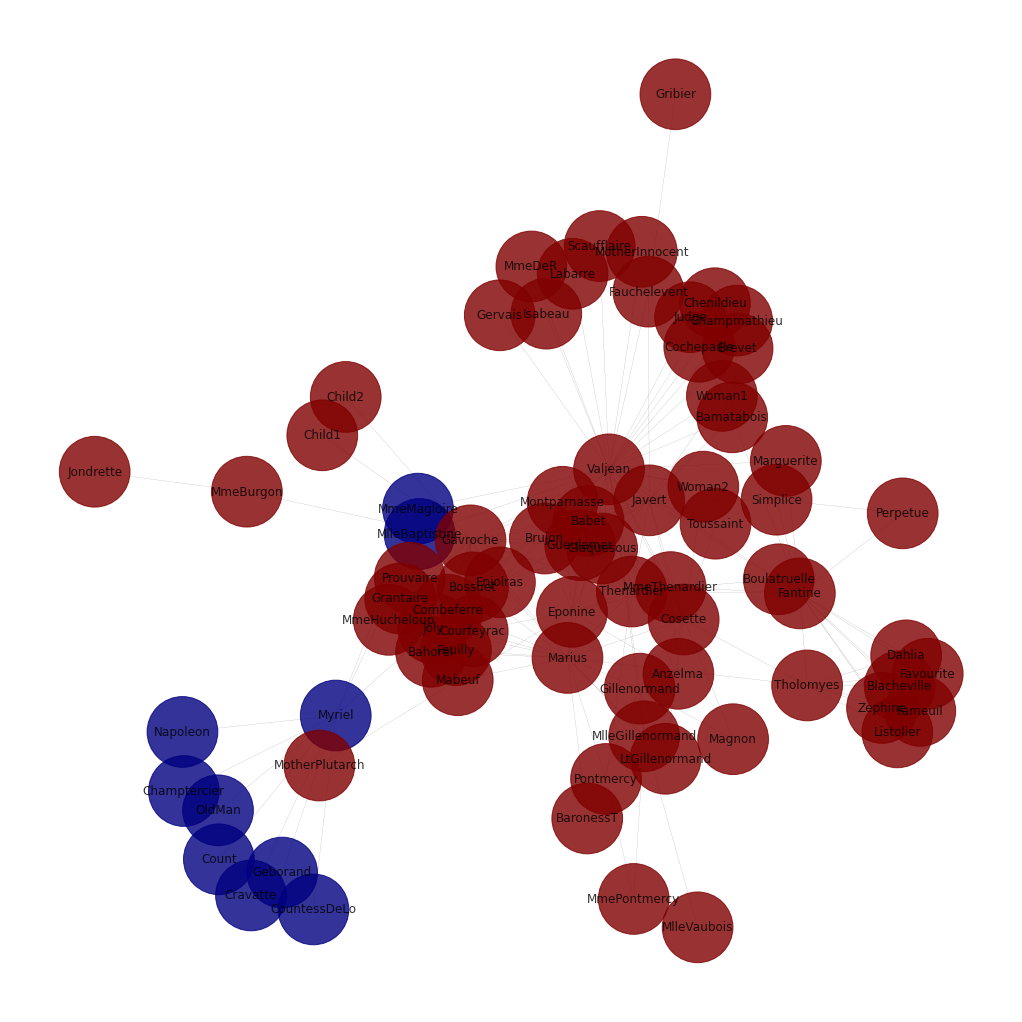

In [26]:
#supprimez les noeuds sans k_clique

node_list = []
node_color = []

percoAttr = nx.get_node_attributes(g, 'girvan')
percoAttrList = list(percoAttr)
print(percoAttr)

for node in percoAttrList:
    if (percoAttr[node] >= 0):
        node_color.append(float(percoAttr[node]))
        node_list.append(node)

print(node_color)
options = {
    'node_color' : node_color, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 5000, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 12,
    "nodelist" : node_list, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8
}

plt.figure(figsize=(14,14))
nx.draw(g,**options)

## Travail à rendre 

Dans ce travail, vous êtes amenés à analyser le réseau de Game of Thrones en utilisant la bibliothèque Networkx, vous trouver ci-dessous les Datasets des différents livre: 

https://github.com/mathbeveridge/asoiaf/tree/master/data 

Ainsi qu'un simple tutorial de base: 

https://www.kaggle.com/mmmarchetti/game-of-thrones-network-analysis

https://dzone.com/articles/analyzing-relationships-in-game-of-thrones-with-ne-1

Vous avez le choix d'utiliser ce que vous voulez comme algorithmes. Toutefois, vous devez répondre à un ensemble de questions: 

1. le caractère le plus important dans game of thrones 
2. l'evolution d'un caractère au fil des saisons (books)
3. les communautés (est ce qu'elles reflétent les vrais communautés dans la série...)
4. ... 4 questions de votre choix avec une réponse convenable  

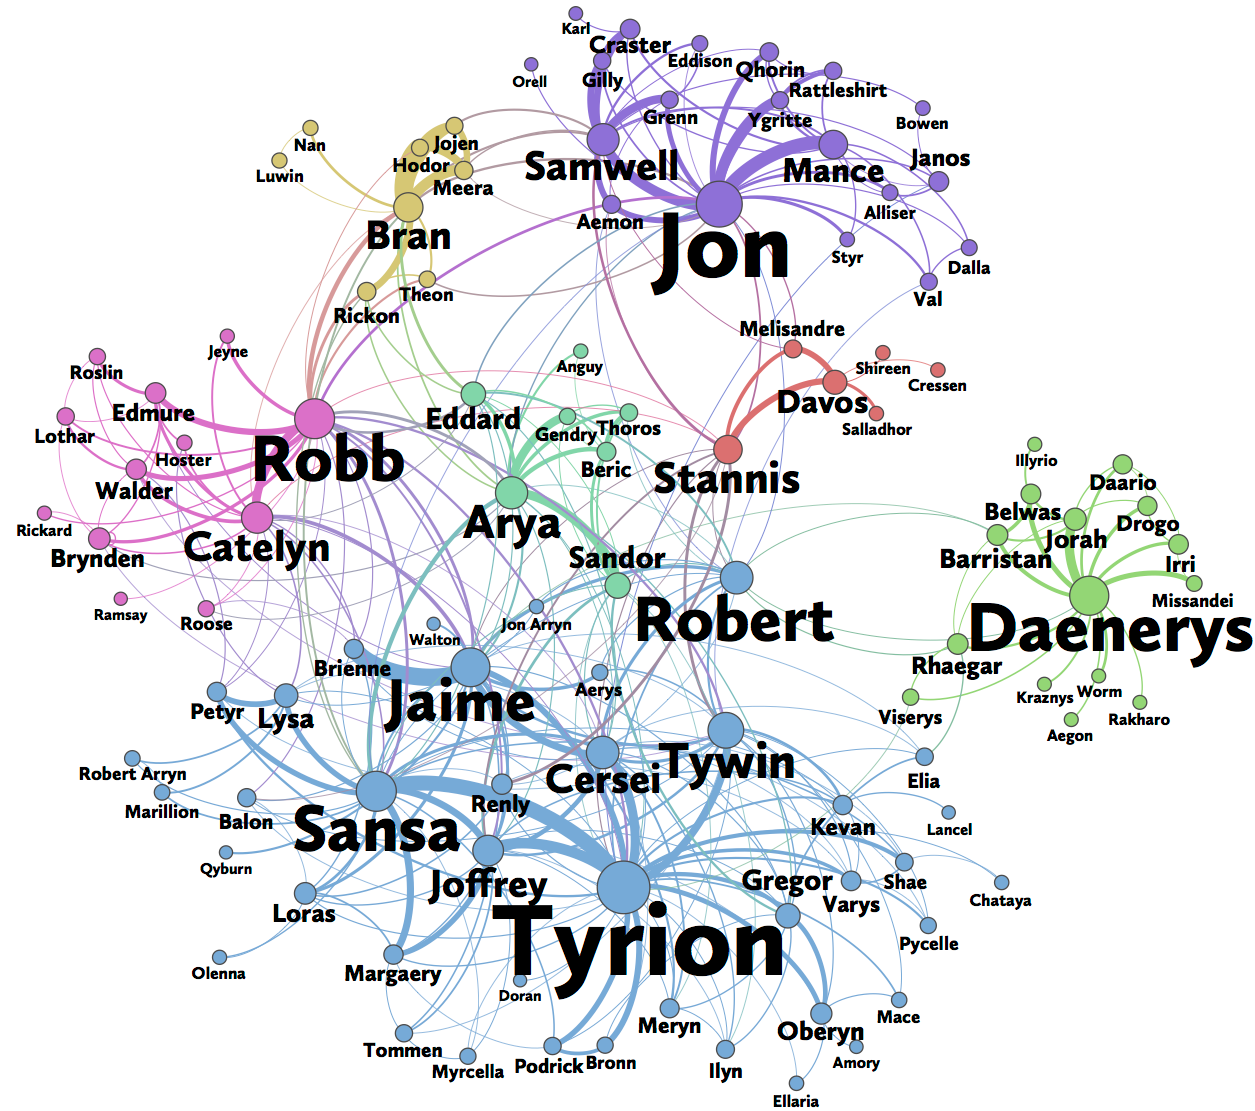

### Creating a list of networks for all the books

In [27]:

import networkx as nx
import pandas as pd

books = []
book_fnames = ["asoiaf-book1-edges.csv","asoiaf-book2-edges.csv", "asoiaf-book3-edges.csv", "asoiaf-book4-edges.csv","asoiaf-book5-edges.csv"]
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)



### 1. le caractère le plus important dans game of thrones:

Pour ce faire , la mesure utilisée est le degrée de centralité.Je détermine le charactère le plus important par book

In [28]:
# creation d'une procedure par book
def caractere_impotant():
    for i in range(5):
        deg_cen_book = nx.degree_centrality(books[i])
        sorted_deg_cen_book = sorted(deg_cen_book.items(), key=lambda x:x[1], reverse=True)[0:1]
        print("Important caracter in book",i+1,":",sorted_deg_cen_book)

caractere_impotant()

Important caracter in book 1 : [('Eddard-Stark', 0.3548387096774194)]
Important caracter in book 2 : [('Tyrion-Lannister', 0.2054263565891473)]
Important caracter in book 3 : [('Tyrion-Lannister', 0.19536423841059603)]
Important caracter in book 4 : [('Jaime-Lannister', 0.23443223443223443)]
Important caracter in book 5 : [('Jon-Snow', 0.1962025316455696)]


### 2. L'évolution d'un caractère au fil des saisons (books):

<AxesSubplot:>

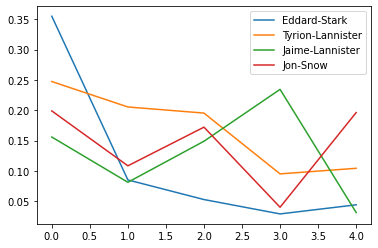

In [29]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister','Jaime-Lannister', 'Jon-Snow']].plot()

Remarque : le degré de centralité change saison après saison des caractères les plus important ( de chaque saison) déterminée dans le script  dans la question précédente  en fonction l'évolution du scénario de la série.

### 3. Les communautés (est ce qu'elles reflétent les vrais communautés dans la série...)

Pour ce faire je vais utilisé  méthode de percolation pour la détermination des communité .Je vais l'appliquer sur le book 2

In [36]:
community = {}
G_book2 = nx.Graph()
book2 = pd.read_csv("asoiaf-book2-edges.csv")
for _, edge in book2.iterrows():
    G_book2.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

community['percolation'] = dictite_to_dict(nxcommunity.k_clique_communities(G_book2, 3))

for k, v in community.items():
    for c_num in range(len(v)):
        for n in v[c_num]:
            G_book2.nodes[n][k] = c_num


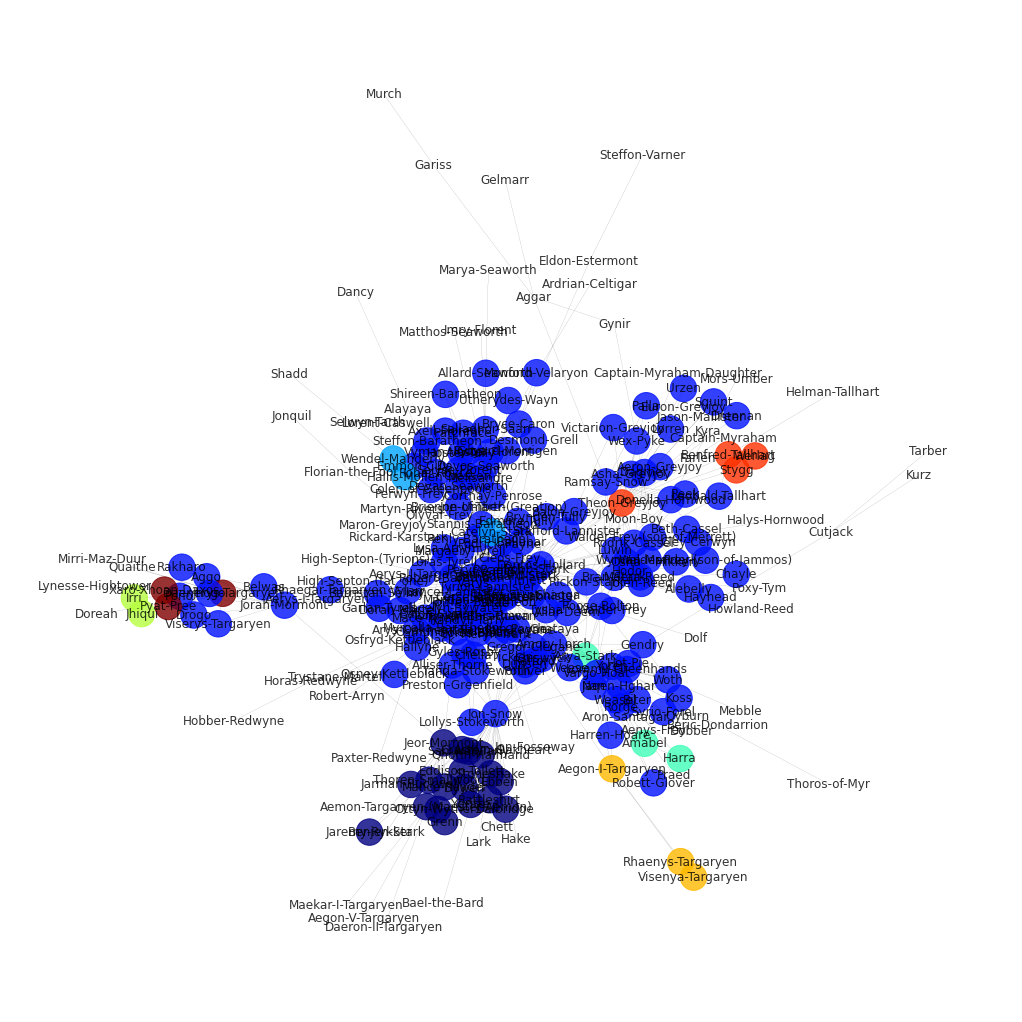

In [38]:
#supprimez les noeuds sans k_clique

node_list = []
node_color = []

percoAttr = nx.get_node_attributes( G_book2,'percolation')
percoAttrList = list(percoAttr)


for node in percoAttrList:
    if (percoAttr[node] >= 0):
        node_color.append(float(percoAttr[node]))
        node_list.append(node)


options = {
    'node_color' : node_color, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 700, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 12,
    "nodelist" : node_list, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8
}

plt.figure(figsize=(14,14))
nx.draw(G_book2,**options)

Remarque : A l'aide de la méthode de percolation, on constate l'existence, dans le book 2, d'une communauté principale et trois autres petites communautés. Dans (Les quatre autres questions je vais essayer d'utiliser d'autre méthode pour comparer les résultats obtenus)
En réalité les communautés représentées reflétent les vraies communautés 

### 4. Autres Questions:

### A- determiner les communautés à l'aide de la méthode de Kernighan–Lin pour le book 2

In [41]:
community = {}
G_book2 = nx.Graph()
book2 = pd.read_csv("asoiaf-book2-edges.csv")
for _, edge in book2.iterrows():
    G_book2.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

community['bipartition'] = dictite_to_dict(nxcommunity.kernighan_lin.kernighan_lin_bisection(G_book2))

for k, v in community.items():
    for c_num in range(len(v)):
        for n in v[c_num]:
            G_book2.nodes[n][k] = c_num


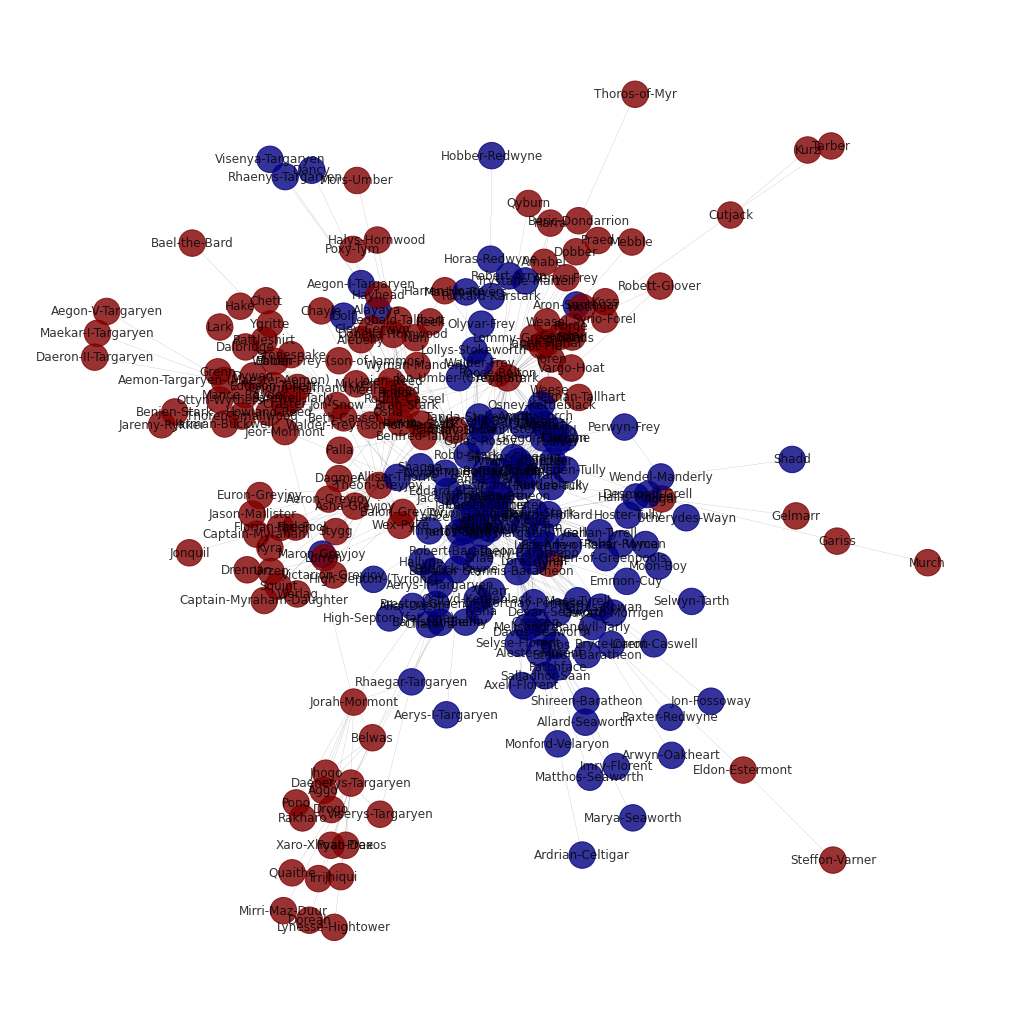

In [42]:
#supprimez les noeuds sans k_clique

node_list = []
node_color = []

percoAttr = nx.get_node_attributes( G_book2,'bipartition')
percoAttrList = list(percoAttr)


for node in percoAttrList:
    if (percoAttr[node] >= 0):
        node_color.append(float(percoAttr[node]))
        node_list.append(node)


options = {
    'node_color' : node_color, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 700, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 12,
    "nodelist" : node_list, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8
}

plt.figure(figsize=(14,14))
nx.draw(G_book2,**options)

Remarque : A l’aide de cette méthode on remarque l’existence dans le book 2 de deux communautés

### B- determiner les communautés à l'aide de la méthode de  Fluid communities pour le book 2

In [43]:
community = {}
G_book2 = nx.Graph()
book2 = pd.read_csv("asoiaf-book2-edges.csv")
for _, edge in book2.iterrows():
    G_book2.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

part=[]
res = {}
partitions = {}
for i in range(2, 6):
    part = list(nxcommunity.asyn_fluidc(G_book2, i))
    res[i] = nxcommunity.quality.coverage(G_book2, dictite_to_dict(part))
    partitions[i] = part
    
community['fluid'] = dictite_to_dict(partitions[max(res, key=res.get)])
for k, v in community.items():
    for c_num in range(len(v)):
        for n in v[c_num]:
            G_book2.nodes[n][k] = c_num


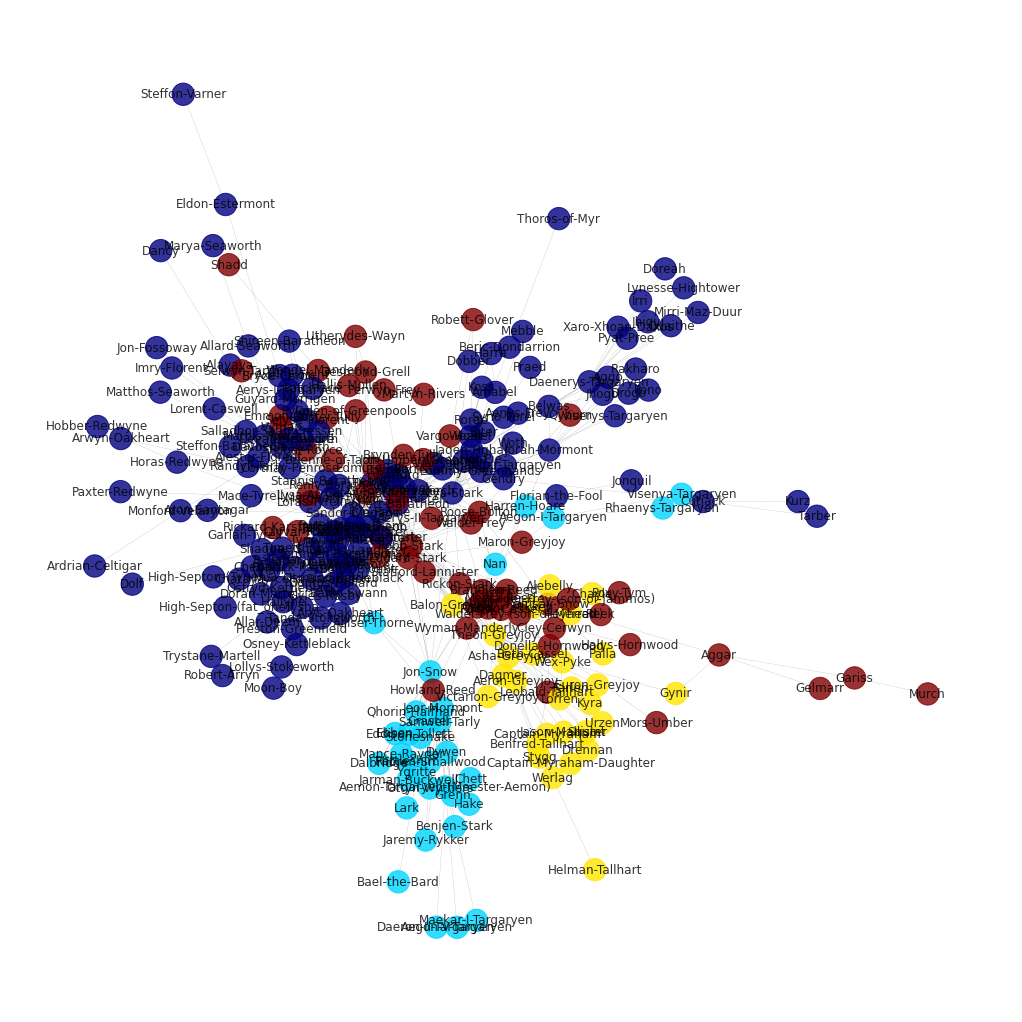

In [44]:
#supprimez les noeuds sans k_clique

node_list = []
node_color = []

girvanAttr = nx.get_node_attributes(G_book2, 'fluid')
girvanAttrList = list(girvanAttr)

for node in girvanAttrList:
    if (girvanAttr[node] >= 0):
        node_color.append(float(girvanAttr[node]))
        node_list.append(node)
        
options = {
    'node_color' : node_color, # une liste contenant ID de communauté des nœuds que nous voulons tracer
    'node_size' : 500, 
    'cmap' : plt.get_cmap("jet"),
    'node_shape' : 'o',
    'with_labels' : True, 
    "width" : 0.1, 
    "font_size" : 12,
    "nodelist" : node_list, # Une liste qui contient les étiquettes des nœuds que nous voulons tracer
    "alpha" : 0.8   
}

plt.figure(figsize=(14,14))
nx.draw(G_book2,**options)

Remarque : A l’aide de cette méthode on remarque l’existence dans le book 2 de quatre communautés

###  c- Calcul des densités des réseaux pour chaque books:

In [45]:
# réalisation d'uen procedure
def density_reseaux():
    for i in range(5):
        print("La densité du book",i+1,"est:",nx.density(books[i]))
density_reseaux()   

La densité du book 1 est: 0.03933068828704502
La densité du book 2 est: 0.02319595342851157
La densité du book 3 est: 0.02203134220706839
La densité du book 4 est: 0.01823480655597444
La densité du book 5 est: 0.015173900890468394


Remarque : La première saison à une densité supérieur que les autres saisons (c’est-à-dire plus de lien entre les acteurs). On constate également qu’après chaque saison la densité diminue

### d. Corrélation entre les mesures 'pagerank, betweenness centrality, degree centrality' ( echantillon d'expérience est le book 4)

In [51]:
# Creating a list of pagerank, betweenness centrality, degree centrality

measures = [nx.pagerank(books[3]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()


,0,1,2
0,1.000000,0.218543,0.201959
1,0.218543,1.000000,0.833816
2,0.201959,0.833816,1.000000


Remarque :on constate une forte corrélation entre mesures  1 et 2 pour notre réseau de cooccurrence de caractères.

In [49]:
# le caractère le plus important du book 4 en se basant sur Corrélation entre les mesures 'pagerank, betweenness centrality, degree centrality'est:
.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank, b_cent)

Cersei-Lannister Stannis-Baratheon
